<a href="https://colab.research.google.com/github/KDcodePy/Sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

Name: Kim Hazed Delfino

##Imports

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn import set_config
set_config(display='diagram')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data 


In [65]:
filename = "/content/drive/MyDrive/sales_predictions.csv"

In [66]:
df = pd.read_csv(filename)


In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning
- checking how many Rows and Columns:

In [69]:
df.shape

(8523, 12)

- checking for data types and non-null counts:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Duplicated Data
- checking for duplicates in our data:

In [71]:
df.duplicated().sum()

0

###Missing Data
-checking for missing values in our data:

In [72]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [73]:
df["Item_Weight"].fillna(0,inplace=True)

- Since almost all of the unique `Item_Identifier` occurred multiple times, we can just get the `mean value` of that `Item_Identifier` and apply it on `NaN`.
- Replaced all the `NaN` values into `0` values so i can reference them inside my for loop



In [74]:
counter = 0
print("Working on my magic", end='')
for item in df['Item_Identifier']:
  if  df.iloc[counter,1] == 0:
    df.iat[counter,1]=df[df["Item_Identifier"] == item]["Item_Weight"].mean()

  if counter % 100 == 0:
    print(".",end='')
  counter += 1
print("Done!") 


Working on my magic......................................................................................Done!


In [75]:
df[df["Item_Weight"] == 0]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,0.0,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,0.0,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,0.0,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- we still have 4 rows that has `0` values, this night cause some issues on our prediction later down the line so we can just change it into `median` values of the entire column.

In [76]:
index_list = [927,1922,4187,5022]

- Created a `list of index` with all the rows that still has `0` values so i can just loop through the list and use it as index value for .iloc
- changed the `0` values into `median` values of the entire column.

In [77]:
for index in index_list:  
  df.iloc[index,1] = df["Item_Weight"].median()

In [78]:
df[df["Item_Weight"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [79]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- replaced `NaN` values with `Missing` values for the 2410 rows since it's more than 2% and less than 80% of the entire dataset for us to consider deleting the column.

In [80]:
df["Outlet_Size"].fillna("Missing", inplace=True) 

In [81]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Data Inconsistency 
- checking for any inconsistency on our data:

In [82]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [83]:
df.replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)

- fixed the name formatting on `LF, reg, and low fat` stay consistent with `Low Fat` and `Regular` 

In [84]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Checking the Min, Avg and Max values in all of the Columns with numerical values:

In [86]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372472,0.066132,140.992782,1997.831867,2181.288914
std,4.633512,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [87]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Visualization


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Visualization & Analysis

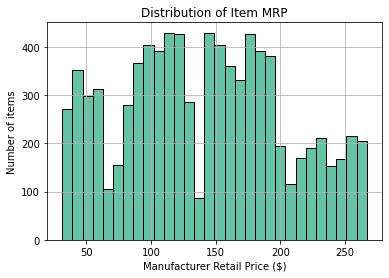

In [89]:
ax = df["Item_MRP"].hist(bins= 30, edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Manufacturer Retail Price ($)')
ax.set_ylabel('Number of items');


  - Here we can see that majority of items in our dataset are within $100~200 Price range.

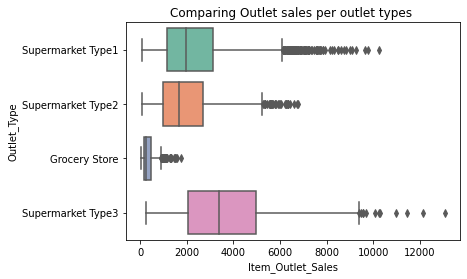

In [90]:
ax = sns.boxplot(x="Item_Outlet_Sales" , y= "Outlet_Type", data=df)
ax.set_title("Comparing Outlet sales per outlet types ");

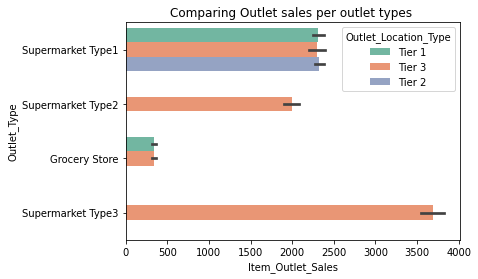

In [91]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Type",hue="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet types ");


  - Here we can see that Supermarket Type3 on Location Tier3 is outperforming other types in terms of average sales 


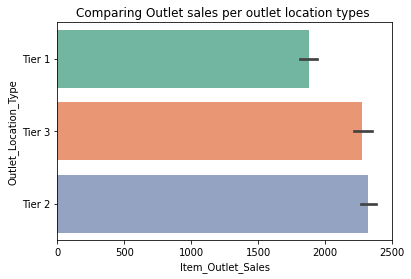

In [92]:
ax = sns.barplot(data=df, x="Item_Outlet_Sales", y="Outlet_Location_Type")
ax.set_title("Comparing Outlet sales per outlet location types ");

- Here we can see that Tier2 outlet location type is outperforming Tier1 and Tier3 in terms of average sales 

In [93]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

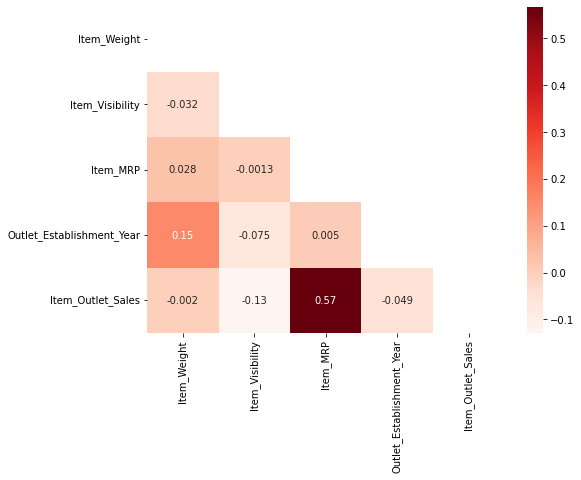

In [94]:
fix, ax = plt.subplots(figsize= (8,6))
ax = sns.heatmap(corr, cmap='Reds', annot = True, mask=mask);

- Here we can see that Item_MRP has moderate correlation with Item_Outlet_Sales 

## Explanatory Visualization & Analysis

### Possible Questions to answer:

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [96]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### what Item type sells the most and least?


In [97]:
ityp = df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
ityp

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

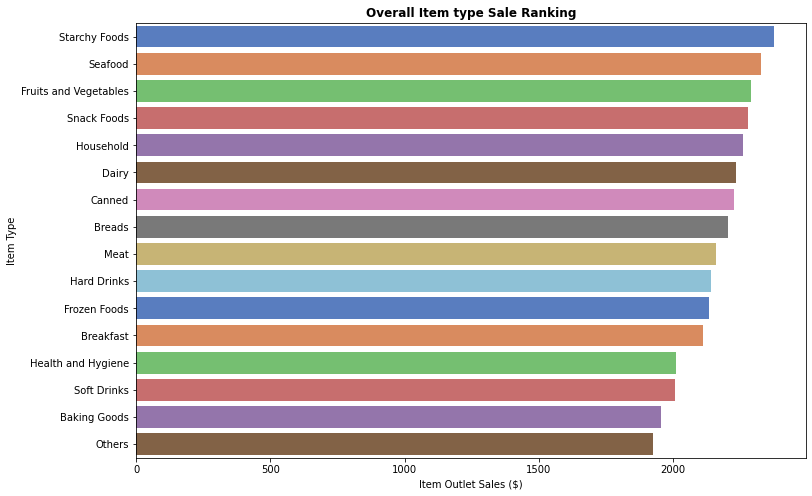

In [98]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette('muted',len(df))
sns.barplot(data=df,x='Item_Outlet_Sales' , y= 'Item_Type', order= ityp.index,errorbar= None)
ax.set_xlabel('Item Outlet Sales ($)')
ax.set_ylabel("Item Type")
ax.set_title('Overall Item type Sale Ranking', fontsize = 12, fontweight= 'bold');

The top three highest Item sale average:
- Starchy Foods
- Seafood
- Fruits and Vegetables 

The bottom three lowest Item sale average:
- Soft Drinks
- Baking Goods
- Others

#### Which Outlets is performing well?


In [99]:
outlet_ranking = df.groupby("Outlet_Identifier")['Item_Outlet_Sales'].mean().sort_values(ascending = False)
outlet_ranking

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

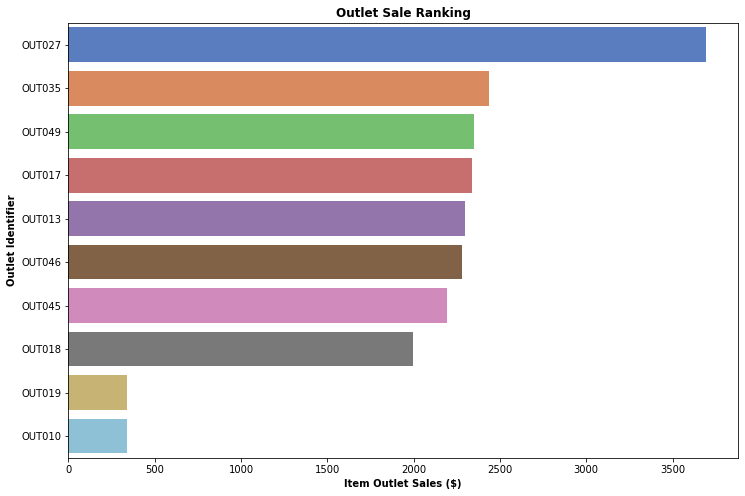

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df,x='Item_Outlet_Sales' , y= 'Outlet_Identifier', order= outlet_ranking.index,errorbar= None)

ax.set_xlabel('Item Outlet Sales ($)', fontsize=10, fontweight='bold')
ax.set_ylabel("Outlet Identifier", fontsize=10, fontweight='bold')
ax.set_title('Outlet Sale Ranking', fontsize = 12, fontweight= 'bold');

- OUT27 is outperforming the other outlets in terms of average sales 

###What are the best seller item types in the top1 outlet?


In [101]:
top_outlet = df[df['Outlet_Identifier']=='OUT027']
grouped_top = top_outlet.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

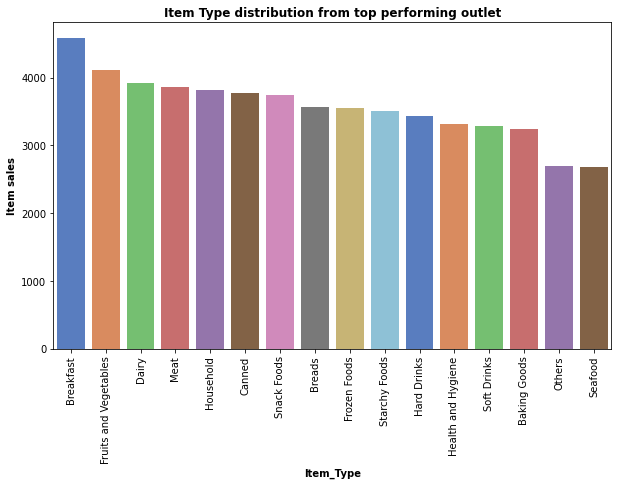

In [102]:
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=top_outlet,x='Item_Type', y ='Item_Outlet_Sales',order=grouped_top.index,errorbar=None)
sns.set_palette('Set2',len(top_outlet))
plt.xticks(rotation = 90)
ax.set_title('Item Type distribution from top performing outlet', fontsize = 12, fontweight = 'bold');
ax.set_xlabel('Item_Type', fontsize = 10, fontweight = 'bold')
ax.set_ylabel('Item sales', fontsize = 10, fontweight = 'bold');


- Best selling item types in top performing outlet are:
  - Breakfast
  - Fruits and Vegetable
  - Dairy

# Preprocessing for Machine learning 

## Reloading the Data 

In [103]:
df1 = pd.read_csv(filename)

## Data Exploration

In [104]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [106]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [107]:
df1.duplicated().sum()

0

In [108]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
df1.replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}, inplace=True)

- replace name formatting for consistency

In [110]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Preprocessing 

In [111]:
X = df1.drop(columns=['Item_Outlet_Sales','Outlet_Establishment_Year'])
y = df1["Item_Outlet_Sales"]
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=42)


- dropped `Outlet_Establishment_Year` because it's irrelevant data

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
dtypes: float64(3), object(7)
memory usage: 666.0+ KB


- Ordinal features are : `None` , based on Exploratory Data Analysis we stablished that `Outlet_Location_Type` Tier1 has no clear advantage vs Tier 2 or 3 and vise-versa so we're putting them categorical features instead.

- Categorical features are : `Item_Identifier, Item_Fat_content, Item_Type, Outlet_Identifier, Outlet_Size , Outlet_Location_Type, Outlet_Type`

- Numerical features are : `Item_Weight, Item_Visibility, Item_MRP`

## Instantiate Column Selector


In [113]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instantiate Tranformers

In [115]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
mean_imputer = SimpleImputer(strategy='mean')
const_imputer = SimpleImputer(strategy='constant',fill_value='missing_value')

## Instantiate Pipeline

In [116]:
num_pipe = make_pipeline(mean_imputer,scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [117]:
cat_pipe = make_pipeline(const_imputer,ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing_value',
                               strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Instantiate ColumnTransformer

In [118]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5cc78b6f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing_value',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5cc78b6fa0>)])

## Transformer Data

In [119]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5cc78b6f40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing_value',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5cc78b6fa0>)])

In [120]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Inspecting Results

In [121]:
print(np.isnan(X_train_processed).sum().sum(),"Missing values in training data")
print(np.isnan(X_test_processed).sum().sum(),'Missing values in testing data')
print()
print(f"All Data in X_train_processed are {X_train_processed}")
print(f"All Data in X_test_processed are {X_test_processed}")
print()
print(f"Shape of Data is {X_train.shape}")
print()
X_train_processed

0 Missing values in training data
0 Missing values in testing data

All Data in X_train_processed are [[ 0.81724868 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5563395  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.13151196  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.11373638 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.76600931 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.81724868 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]
All Data in X_test_processed are [[ 0.33100885 -0.77664625 -0.99881554 ...  1.          0.
   0.        ]
 [-1.17989246  0.1003166  -1.58519423 ...  1.          0.
   0.        ]
 [ 0.37844688 -0.48299432 -1.59578435 ...  1.          0.
   0.        ]
 ...
 [-1.13957013  1.21832428  1.09397975 ...  1.          0.
   0.        ]
 [-1.49772727 -0.77809567 -0.36679966 ...  1.          0.
   0.        ]
 [ 0.52076098 -0.77976293  0.11221189 ...  1.      

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])